# Download Data

In [1]:
import yfinance as yf
ETF = "006208.TW"
History = "10y"
all_day_k = yf.Ticker(ETF).history(period = History, interval = "1d")

all_day_k

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2014-05-21 00:00:00+08:00,25.352109,25.352109,25.344858,25.344858,5000,0.0,0.0,0.0
2014-05-22 00:00:00+08:00,25.388355,25.591345,25.388355,25.591345,133000,0.0,0.0,0.0
2014-05-23 00:00:00+08:00,25.663842,25.700090,25.627592,25.678339,8000,0.0,0.0,0.0
2014-05-26 00:00:00+08:00,25.787088,25.787088,25.787088,25.787088,1000,0.0,0.0,0.0
2014-05-27 00:00:00+08:00,25.801588,25.830587,25.794340,25.830587,11000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-05-14 00:00:00+08:00,95.300003,96.150002,95.199997,96.150002,2690743,0.0,0.0,0.0
2024-05-15 00:00:00+08:00,96.650002,98.199997,96.650002,97.500000,4232415,0.0,0.0,0.0
2024-05-16 00:00:00+08:00,98.699997,99.300003,97.849998,98.099998,7812350,0.0,0.0,0.0


# Filter data

In [2]:
all_day_k = all_day_k.drop(columns=["Dividends", "Stock Splits","Capital Gains"])
all_day_k = all_day_k[:-1]
all_day_k

,Open,High,Low,Close,Volume
Date,,,,,
2014-05-21 00:00:00+08:00,25.352109,25.352109,25.344858,25.344858,5000
2014-05-22 00:00:00+08:00,25.388355,25.591345,25.388355,25.591345,133000
2014-05-23 00:00:00+08:00,25.663842,25.700090,25.627592,25.678339,8000
2014-05-26 00:00:00+08:00,25.787088,25.787088,25.787088,25.787088,1000
2014-05-27 00:00:00+08:00,25.801588,25.830587,25.794340,25.830587,11000
...,...,...,...,...,...
2024-05-13 00:00:00+08:00,95.650002,96.000000,95.349998,95.400002,4509173
2024-05-14 00:00:00+08:00,95.300003,96.150002,95.199997,96.150002,2690743
2024-05-15 00:00:00+08:00,96.650002,98.199997,96.650002,97.500000,4232415


# Construct dataset

In [3]:
import numpy as np
import pandas as pd

PAST_WIN_LEN = 100
CLASSES = ["Bull", "Bear"]
LABEL_BULL = CLASSES.index("Bull")
LABEL_BEAR = CLASSES.index("Bear")

x, y = [], []
for today_i in range(len(all_day_k)):
    day_k_past = all_day_k[:today_i + 1]
    day_k_forward = all_day_k[today_i + 1:]
    if len(day_k_past) < PAST_WIN_LEN or len(day_k_forward) < 1:
        continue
    day_k_past_win = day_k_past[-PAST_WIN_LEN:]
    day_k_forward_win = day_k_forward[:1]

    today_price = day_k_past_win.iloc[-1]["Close"]
    tomorrow_price = day_k_forward_win.iloc[0]["Close"]
    label = LABEL_BULL if tomorrow_price > today_price else LABEL_BEAR

    x.append(day_k_past_win.values)
    y.append(label)

x, y = np.array(x), np.array(y)

In [4]:
x.shape

(2337, 100, 5)

In [5]:
x

array([[[2.53521094e+01, 2.53521094e+01, 2.53448582e+01, 2.53448582e+01,
         5.00000000e+03],
        [2.53883549e+01, 2.55913448e+01, 2.53883549e+01, 2.55913448e+01,
         1.33000000e+05],
        [2.56638421e+01, 2.57000899e+01, 2.56275915e+01, 2.56783390e+01,
         8.00000000e+03],
        ...,
        [2.71282787e+01, 2.71282787e+01, 2.71282787e+01, 2.71282787e+01,
         1.00000000e+03],
        [2.71282711e+01, 2.71862698e+01, 2.71282711e+01, 2.71862698e+01,
         5.10000000e+04],
        [2.70557825e+01, 2.70557825e+01, 2.64613094e+01, 2.64613094e+01,
         1.20000000e+04]],

       [[2.53883549e+01, 2.55913448e+01, 2.53883549e+01, 2.55913448e+01,
         1.33000000e+05],
        [2.56638421e+01, 2.57000899e+01, 2.56275915e+01, 2.56783390e+01,
         8.00000000e+03],
        [2.57870884e+01, 2.57870884e+01, 2.57870884e+01, 2.57870884e+01,
         1.00000000e+03],
        ...,
        [2.71282711e+01, 2.71862698e+01, 2.71282711e+01, 2.71862698e+01,
        

In [6]:
y.shape

(2337,)

In [7]:
y

array([0, 1, 1, ..., 0, 0, 1])

# Split dataset to training/validation/test datasets

In [8]:
TRAIN_SPLIT, VAL_SPLIT, TEST_SPLIT = 0.7, 0.2, 0.1

test_split_index = -round(len(x) * TEST_SPLIT)
x_other, x_test = np.split(x, [test_split_index])
y_other, y_test = np.split(y, [test_split_index])

train_split_index = round(len(x) * TRAIN_SPLIT)
indexes = np.arange(len(x_other))
np.random.shuffle(indexes)
train_indexes, val_indexes = np.split(indexes, [train_split_index])
x_train, x_val = x_other[train_indexes], x_other[val_indexes]
y_train, y_val = y_other[train_indexes], y_other[val_indexes]

In [9]:
label_distribution = pd.DataFrame([
                                {"Dataset": "train",
                                    "Bull": np.count_nonzero(y_train == LABEL_BULL),
                                    "Bear": np.count_nonzero(y_train == LABEL_BEAR)},
                                {"Dataset": "val",
                                    "Bull": np.count_nonzero(y_val == LABEL_BULL),
                                    "Bear": np.count_nonzero(y_val == LABEL_BEAR)},
                                {"Dataset": "test",
                                    "Bull": np.count_nonzero(y_test == LABEL_BEAR),
                                    "Bear": np.count_nonzero(y_test == LABEL_BEAR),}])

label_distribution

,Dataset,Bull,Bear
0,train,812,824
1,val,229,238
2,test,107,107


In [10]:
x_test_bull = x_test[y_test == LABEL_BULL]
x_test_bear = x_test[y_test == LABEL_BEAR]

min_n_labels = min(len(x_test_bull), len(x_test_bear))

x_test_bull = x_test_bull[np.random.choice(len(x_test_bull), min_n_labels, replace=False), :]
x_test_bear = x_test_bear[np.random.choice(len(x_test_bear), min_n_labels, replace=False), :]
x_test = np.vstack([x_test_bull, x_test_bear])

y_test = np.array([LABEL_BULL] * min_n_labels + [LABEL_BEAR] * min_n_labels)

pd.DataFrame([
            {"Dataset": "test",
                "Bull": np.count_nonzero(y_test == LABEL_BEAR),
                "Bear": np.count_nonzero(y_test == LABEL_BEAR)}])

,Dataset,Bull,Bear
0,test,107,107


In [11]:
x_train.shape

(1636, 100, 5)

In [12]:
1637 * 100 * 5

818500

# Save datasets

In [13]:
np.savez("datasets.npz", x_train = x_train, y_train = y_train, x_val = x_val, y_val = y_val, 
         x_test = x_test, y_test = y_test)

# Construct model

In [14]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

n_time_steps = x_train.shape[1]
n_features = x_train.shape[2]

input_layer = Input(shape = (n_time_steps, n_features))
x = Flatten()(input_layer)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output_layer = Dense(len(CLASSES), activation="softmax")(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 5)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       128,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194,562 (760.01 KB)

 Trainable params: 194,562 (760.01 KB)

 Non-trainable params: 0 (0.00 B)

# Train model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.python.keras.utils import np_utils

model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_checkpoint = ModelCheckpoint(filepath="best_model_MLP.keras", monitor="val_loss", save_best_only=True)

early_stopping = EarlyStopping(monitor="val_loss", patience=100, restore_best_weights=True)
callbacks = [model_checkpoint, early_stopping]

train_history = model.fit(
    x_train,
    np_utils.to_categorical(y_train),
    validation_data = (x_val, np_utils.to_categorical(y_val)),
    batch_size = 2048,
    epochs = 1000,
    callbacks=[callbacks])

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5128 - loss: 146839.1562 - val_accuracy: 0.5096 - val_loss: 666460.1250
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5043 - loss: 572379.6875 - val_accuracy: 0.5096 - val_loss: 554246.2500
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5037 - loss: 469527.7812 - val_accuracy: 0.5096 - val_loss: 257577.9062
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5031 - loss: 209335.5156 - val_accuracy: 0.4882 - val_loss: 114269.9375
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5287 - loss: 94637.9766 - val_accuracy: 0.4754 - val_loss: 212030.0312
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5067 - loss: 202536.3906 - val_accuracy: 0.4754 - val_loss: 185222.6094
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5055 - loss: 172638.9375 - val_accuracy: 0.4775 - val_loss: 93546.4922
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms

In [16]:
import matplotlib.pyplot as plt
from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


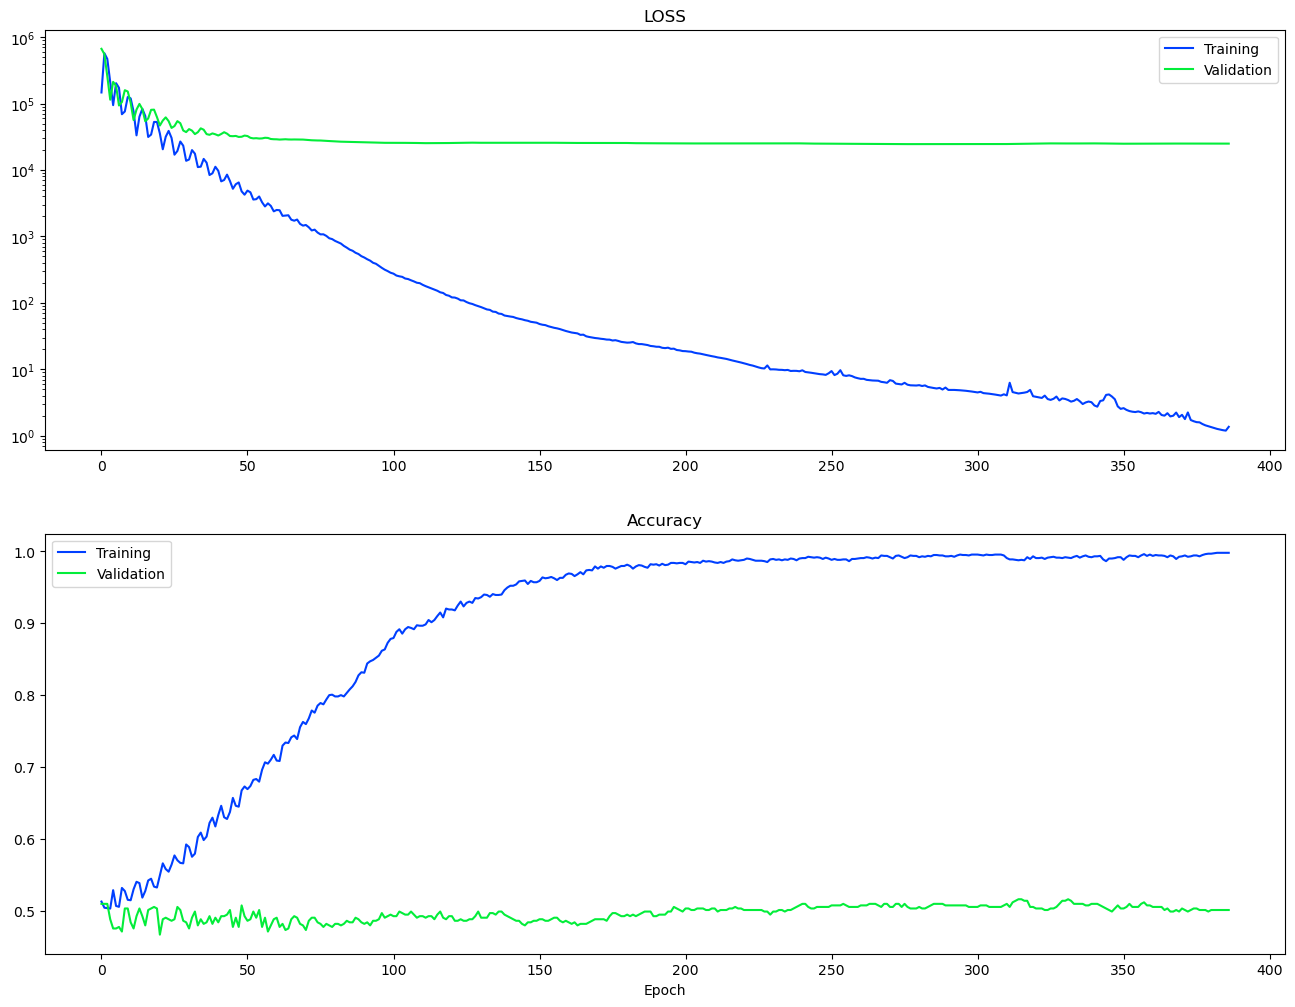

In [17]:
import matplotlib.pyplot as plt
import os

if not os.path.exists('images'):
    os.makedirs('images')

plt.style.use('seaborn-v0_8-bright')
fit, axes = plt.subplots(2, 1, figsize = (16, 12))

axes[0].set_title("LOSS")
axes[0].set_yscale("log")
axes[0].plot(train_history.history["loss"], label = "Training")
axes[0].plot(train_history.history["val_loss"], label = "Validation")
axes[0].legend()


axes[1].set_title("Accuracy")
axes[1].plot(train_history.history["accuracy"], label = "Training")
axes[1].plot(train_history.history["val_accuracy"], label = "Validation")
axes[1].set_xlabel("Epoch")
axes[1].legend()

# save plot
plt.figure(1)
plt.savefig('images/training_history.png')

# Evaluate model

In [18]:
from keras.utils import to_categorical
model.evaluate(x_test, to_categorical(y_test))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5390 - loss: 69233.2812 


[67887.484375, 0.5373831987380981]

In [19]:
from tensorflow.math import argmax, confusion_matrix

y_pred_prob = model.predict(x_test)
y_pred = argmax(y_pred_prob, axis = -1)
cm = confusion_matrix(y_test, y_pred, num_classes = len(CLASSES)).numpy()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


# Confusion matrix

In [20]:
from tensorflow.math import argmax, confusion_matrix

y_pred_prob = model.predict(x_test)
y_pred = argmax(y_pred_prob, axis=-1)
cm = confusion_matrix(y_test, y_pred, num_classes=len(CLASSES)).numpy()

cm

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[61, 46],
       [53, 54]])

Text(33.22222222222222, 0.5, 'Label')

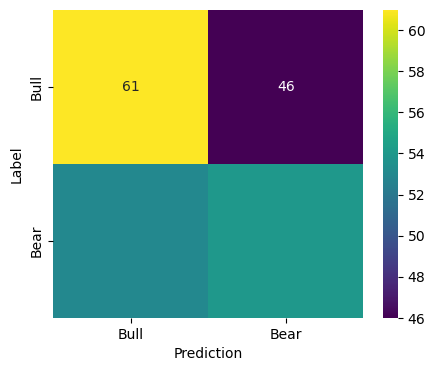

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.heatmap(cm, xticklabels= CLASSES, yticklabels=CLASSES, annot=True, fmt = 'g', cmap='viridis')

plt.xlabel("Prediction")
plt.ylabel("Label")

In [22]:
n_bull_pred = cm[LABEL_BULL, LABEL_BULL] + cm[LABEL_BEAR, LABEL_BULL]
n_bull_true_pos = cm[LABEL_BULL, LABEL_BULL]
bull_accuracy = n_bull_true_pos / n_bull_pred if n_bull_pred > 0 else 0

n_bear_pred = cm[LABEL_BULL, LABEL_BEAR] + cm[LABEL_BEAR, LABEL_BEAR]
n_bear_true_pos = cm[LABEL_BEAR, LABEL_BEAR]
bear_accuracy = n_bear_true_pos / n_bear_pred if n_bear_pred > 0 else 0

n_total_pred = n_bull_pred + n_bear_pred
n_total_true_pos = n_bull_true_pos + n_bear_true_pos
total_accuracy = n_total_true_pos / n_total_pred if n_total_pred > 0 else 0

pd.DataFrame([{"Prediction": "Bull", "Accuracy": bull_accuracy},
              {"Prediction": "Bear", "Accuracy": bear_accuracy},
              {"Prediction": "Total", "Accuracy": total_accuracy}
              ])

,Prediction,Accuracy
0,Bull,0.535088
1,Bear,0.540000
2,Total,0.537383
